#### Importação de Bibliotecas e Configuração Inicial

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)

A parte de carregar os dados e separar o de validação foi feito no notebook 1

#### Carregando os dados 

In [14]:
val_df = pd.read_csv(r'C:\Users\User\Documents\Estudos Ciencia de dados\case\data\val_data.csv')


In [16]:
val_df['date'] = pd.to_datetime(val_df['date'])
for df in [ val_df]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    df['week_of_year'] = df['date'].dt.isocalendar().week     
    df['installs_weekday'] = df['newinstalls'] * df['day_of_week']
    
val_df.drop(columns=['date'], inplace=True)


X_val = val_df.drop(columns=['target'])
y_val = val_df['target']

#### Fazendo Previsões

In [21]:
final_model_path = "models/final_random_forest_model.pkl"

# Carregar o modelo salvo
loaded_final_model = joblib.load(final_model_path)

# Fazer predições para verificar integridade
y_pred = loaded_final_model.predict(X_val)
print("Predições de teste com o modelo carregado:", y_pred)

Predições de teste com o modelo carregado: [ 12684.89693333   9157.892      346352.125      ...   5952.23970397
  46094.76        20719.61698667]


####  Calculando Métricas

In [22]:
# 4. Calculando Métricas
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred) * 100
medape = np.median(np.abs((y_val - y_pred) / y_val)) * 100

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"MedAPE: {medape:.2f}%")

MAE: 4476.87
MSE: 155309702.48
RMSE: 12462.33
R²: 0.9903
MAPE: 13.64%
MedAPE: 4.76%


#### Visualizações

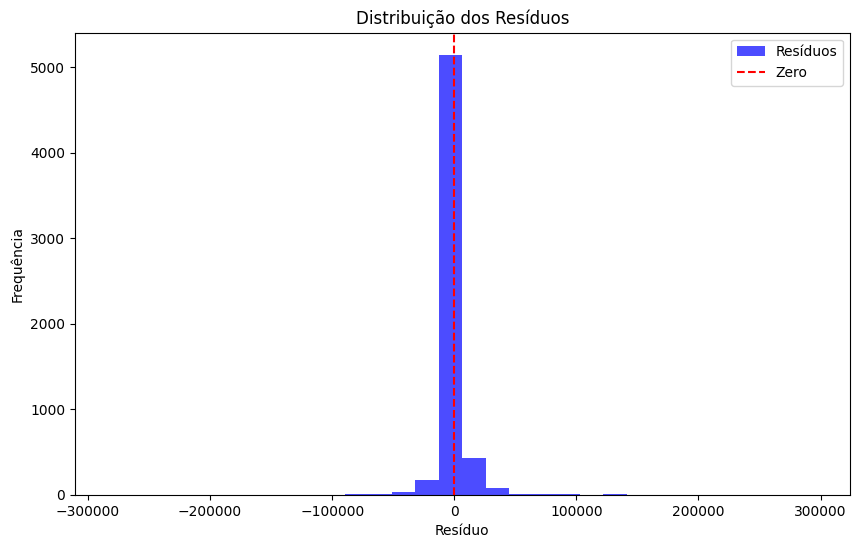

In [23]:
# Gráfico de Resíduos
residuos = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, alpha=0.7, color='blue', label='Resíduos')
plt.axvline(0, color='red', linestyle='--', label='Zero')
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduo")
plt.ylabel("Frequência")
plt.legend()
plt.show()


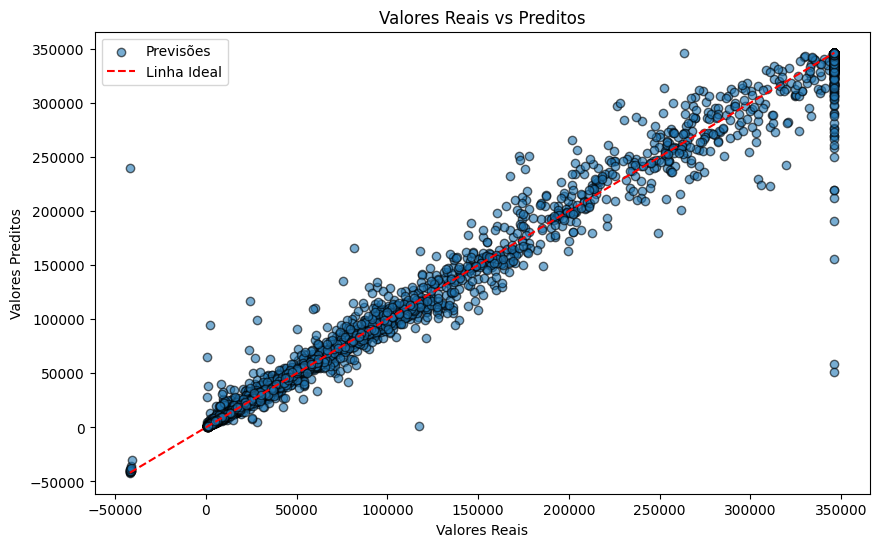

In [24]:
# Gráfico de Erros Preditivos
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.6, edgecolor='k', label='Previsões')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', label='Linha Ideal')
plt.title("Valores Reais vs Preditos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.legend()
plt.show()

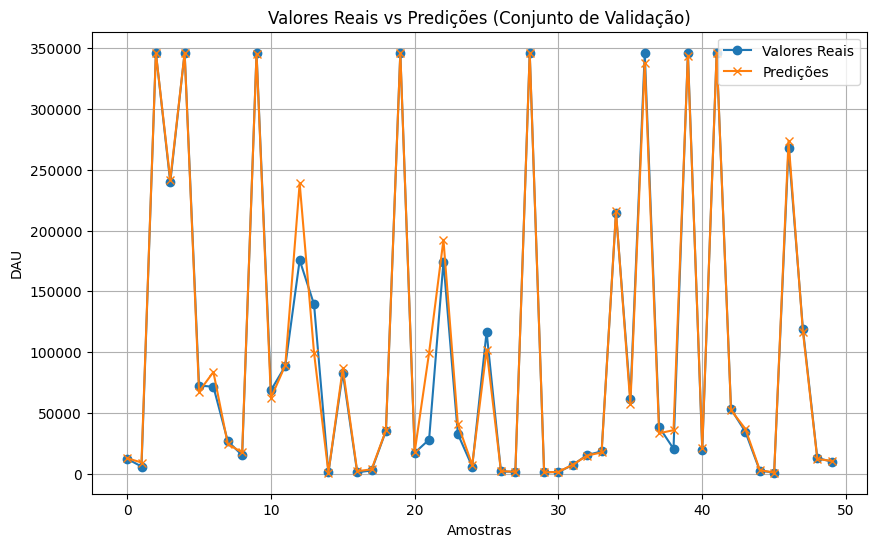

In [27]:
# Comparar valores reais e previstos
plt.figure(figsize=(10, 6))
plt.plot(y_val.values[:50], label="Valores Reais", marker="o")
plt.plot(y_pred[:50], label="Predições", marker="x")
plt.legend()
plt.title("Valores Reais vs Predições (Conjunto de Validação)")
plt.xlabel("Amostras")
plt.ylabel("DAU")
plt.grid()
plt.show()